# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print (weather_api_key)

## Generate Cities List

In [30]:
baseURL = "http://api.openweathermap.org/data/2.5/weather?"


lat_lngs = []
cities = []

# random lat and lng 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
api_key = ""


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key  
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
      
        record= record + 1
        
        # Wait a second in loop
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found... Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Sampit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=sampit
Processing Record 2 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=yellowknife
Processing Record 3 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=rikitea
Processing Record 4 | Newtownards
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=newtownards
Processing Record 5 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=puerto ayora
City not found. Skipping...
Processing Record 6 | Gummidipundi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=gummidipundi
Processing Record 7 | Buraidah
http

Processing Record 56 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=saldanha
Processing Record 57 | La Ciotat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=la ciotat
Processing Record 58 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=grand gaube
Processing Record 59 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=bethel
Processing Record 60 | Bandiagara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=bandiagara
Processing Record 61 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=hilo
Processing Record 62 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kapa

Processing Record 112 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=san patricio
Processing Record 113 | Seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=seoul
Processing Record 114 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=saint-augustin
Processing Record 115 | Manaus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=manaus
Processing Record 116 | Kem'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kem
Processing Record 117 | Havre-St-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=havre-saint-pierre
Processing Record 118 | Homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b

City not found. Skipping...
Processing Record 167 | Aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=aykhal
Processing Record 168 | Necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=necochea
Processing Record 169 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=hamilton
Processing Record 170 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=srednekolymsk
City not found. Skipping...
Processing Record 171 | Kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kedrovyy
Processing Record 172 | Yangi Marg`ilon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=komsomolskiy
City not found. Skipping...
Processing Record 173 | Padan

Processing Record 222 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=souillac
City not found. Skipping...
Processing Record 223 | Bara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=bara
Processing Record 224 | Muyezerskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=muyezerskiy
Processing Record 225 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=norman wells
Processing Record 226 | Fallon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=fallon
Processing Record 227 | Kungurtug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kungurtug
Processing Record 228 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 278 | Kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kindu
Processing Record 279 | Bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=bukama
Processing Record 280 | Nizwá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=nizwa
City not found. Skipping...
Processing Record 281 | Rovaniemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=rovaniemi
Processing Record 282 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=anadyr
Processing Record 283 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=port blair
Processing Record 284 | Shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b

Processing Record 334 | Kadiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kadiri
Processing Record 335 | Chapecó
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=chapeco
Processing Record 336 | Kristinestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kristiinankaupunki
Processing Record 337 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=bonthe
Processing Record 338 | Llanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=llanes
Processing Record 339 | Ondjiva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=ondjiva
City not found. Skipping...
Processing Record 340 | Ituango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da

Processing Record 391 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=egvekinot
Processing Record 392 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=pacific grove
Processing Record 393 | Ojinaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=ojinaga
Processing Record 394 | Verkhnyaya Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=verkhnyaya inta
Processing Record 395 | Asunción
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=asuncion
Processing Record 396 | Benghazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=benghazi
Processing Record 397 | Andenes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23

Processing Record 447 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=ostrovnoy
Processing Record 448 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=aksu
Processing Record 449 | Pelaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=pelaya
City not found. Skipping...
Processing Record 450 | Korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=korla
Processing Record 451 | Kon Tum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kon tum
Processing Record 452 | Tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=tateyama
Processing Record 453 | Conceição do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23

Processing Record 504 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=ahipara
Processing Record 505 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=sola
Processing Record 506 | Sarangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=sarangani
Processing Record 507 | San Gabriel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=san gabriel
Processing Record 508 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=half moon bay
Processing Record 509 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e8ff9077b9cb6&q=kavaratti
Processing Record 510 | Sørland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10da23fed6de4b2a0b1e

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

WeatherDF = pd.DataFrame(weatherpy_dict)

WeatherDF.head()

#WeatherDF = pd.read_csv('csv/weather.csv')

#WeatherDF = pd.DataFrame(list(zip(city_name, cloudiness)),
                    #columns =['City', 'Cloudiness']
#WeatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sampit,39,ID,1587177642,68,-2.53,112.95,88.36,3.06
1,Yellowknife,90,CA,1587177610,63,62.46,-114.35,28.00,9.17
2,Rikitea,1,PF,1587177524,63,-23.12,-134.97,77.36,1.99
3,Newtownards,1,GB,1587177375,86,54.59,-5.69,42.01,4.70
4,Puerto Ayora,82,EC,1587177524,94,-0.74,-90.35,75.99,6.33


In [69]:
# Save data frame to CSV
WeatherDF.to_csv(output_data_file)






## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#find any humidity value > 100
WeatherDF.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,544.000000,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000
mean,55.308824,1.587178e+09,69.437500,20.917647,17.230790,59.596379,7.745882
std,38.198332,2.311294e+02,21.334047,33.568538,91.122728,21.299730,5.501993
min,0.000000,1.587177e+09,11.000000,-54.800000,-179.170000,-3.080000,0.360000
25%,19.000000,1.587178e+09,58.000000,-4.617500,-62.310000,45.437500,3.462500
50%,69.500000,1.587178e+09,75.000000,23.005000,20.055000,61.925000,6.920000
75%,90.000000,1.587178e+09,85.000000,48.940000,98.267500,77.322500,10.290000
max,100.000000,1.587178e+09,100.000000,78.220000,179.320000,96.390000,35.570000


In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

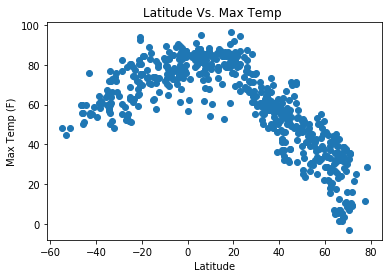

In [60]:
plt.scatter(WeatherDF["Lat"],WeatherDF["Max Temp"],marker ="o")
plt.title("Latitude Vs. Max Temp ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()
plt.savefig("latvtemp.png")

# This plot shows that the closer a city is to the equator, the higher the temperature will be. We can also tell that there are more cities in the Northern Hemisphere than the Southern Hemisphere.

## Latitude vs. Humidity Plot

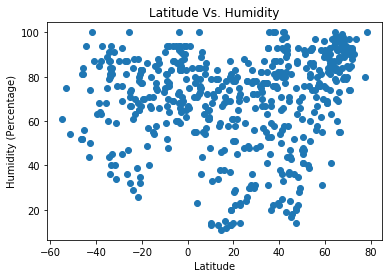

In [57]:
plt.scatter(WeatherDF["Lat"],WeatherDF["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (Percentage)")
plt.show()
plt.savefig("latvhum.png")

# This plot shows that there is not much correlation between Latitude and Humidity. Humidity might, instead, be caused by something else such as distance from the sea or other geographical variables. 

## Latitude vs. Cloudiness Plot

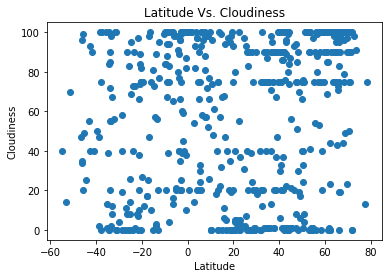

In [61]:
plt.scatter(WeatherDF["Lat"],WeatherDF["Cloudiness"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("latvcloud.png")

# This plot shows that there is not much correlation between Latitude and Cloudiness. Cloudiness might, instead, be caused by something else such as distance from the sea or other geographical variables. 

## Latitude vs. Wind Speed Plot

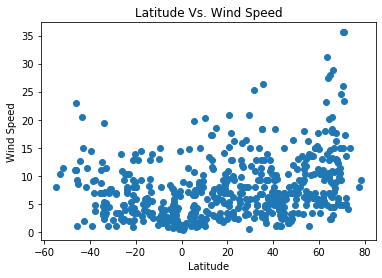

In [62]:
plt.scatter(WeatherDF["Lat"],WeatherDF["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("latvwind.png")

# This plot shows that there are stronger winds in the north. There is no strong trend but the plot shows higher values at both extreme ends. 

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots

In [9]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression